In [28]:
# Imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

import missingno as msno
import warnings

plt.style.use('seaborn')
sns.set(font_scale = 1.2, style='white', context='notebook', palette='deep')
pylab.rcParams['figure.figsize'] = 12,8
warnings.filterwarnings('ignore')
mpl.style.use('ggplot')
sns.set_style('white')
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
df_train.shape

(891, 12)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
for col in df_train.columns:
    msg = 'column: {:<11}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column: Survived   	 Percent of NaN value: 0.00%
column: Pclass     	 Percent of NaN value: 0.00%
column: Name       	 Percent of NaN value: 0.00%
column: Sex        	 Percent of NaN value: 0.00%
column: Age        	 Percent of NaN value: 19.87%
column: SibSp      	 Percent of NaN value: 0.00%
column: Parch      	 Percent of NaN value: 0.00%
column: Ticket     	 Percent of NaN value: 0.00%
column: Fare       	 Percent of NaN value: 0.00%
column: Cabin      	 Percent of NaN value: 77.10%
column: Embarked   	 Percent of NaN value: 0.22%


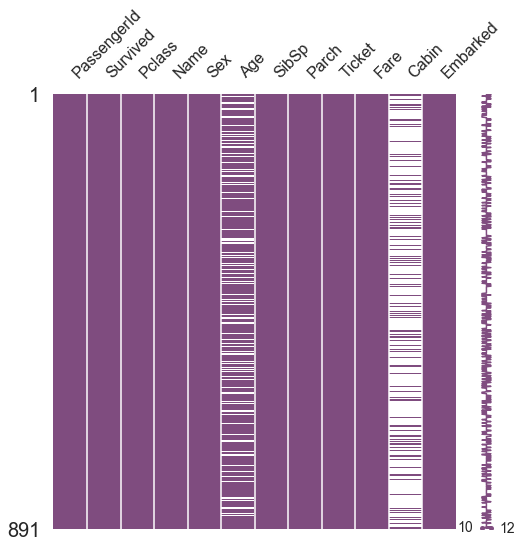

In [9]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.5, 0.3, 0.5))

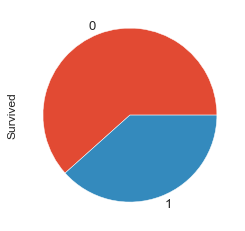

In [31]:
df_train['Survived'].value_counts().plot.pie()

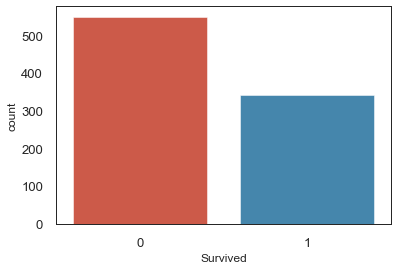

In [30]:
sns.countplot('Survived', data=df_train)

In [19]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [20]:
df_train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

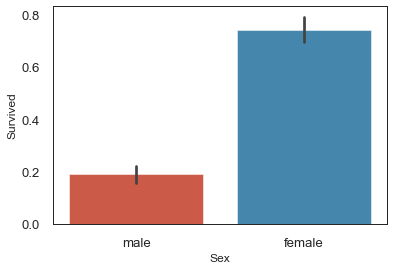

In [29]:
sns.barplot(x='Sex', y='Survived', data=df_train)

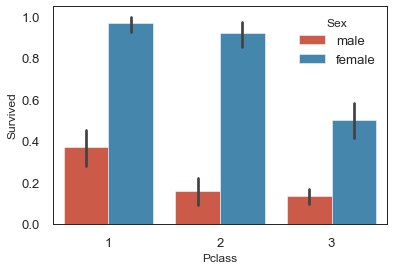

In [32]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df_train)